In [3]:
# This will take a few minutes - run once
!pip install pandas numpy matplotlib seaborn scikit-learn
!pip install lightgbm xgboost
!pip install pillow requests

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached xgboost-3.0.5-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached lightgbm-4.6.0-py3-none-win_amd64.whl (1.5 MB)
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 5.9 MB/s eta 0:00:10
   - -------------------------------------- 1.6/56.8 MB 4.8 MB/s eta 0:00:12
   - -------------------------------------- 2.4/56.8 MB 4.4 MB/s eta 0:00:13
   -- ------------------------------------- 3.1/56.8 MB 4.1 MB/s eta 0:00:14
   -- ------------------------------------- 3.9/56.8 MB 3.9 MB/s eta 0:00:14
   --- ------------------------------------ 4.7/56.8 MB 3.8 MB/s eta 0:00:14
   --- ------------------------------------ 5.5/56.8 MB 3.8 MB/s eta 0:00:14
   ---- ---------------------------

In [6]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Change to your project directory
os.chdir('C:/Users/adity/OneDrive/Desktop/smart_pricing')
print("Changed directory to:", os.getcwd())

# Load datasets
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
sample_out = pd.read_csv('dataset/sample_test_out.csv')

print("\nDataset Shapes:")
print(f"Train: {train_df.shape}")
print(f"Test: {test_df.shape}")
print("\nFirst few rows:")
print(train_df.head())

Changed directory to: C:\Users\adity\OneDrive\Desktop\smart_pricing

Dataset Shapes:
Train: (75000, 4)
Test: (75000, 3)

First few rows:
   sample_id                                    catalog_content  \
0      33127  Item Name: La Victoria Green Taco Sauce Mild, ...   
1     198967  Item Name: Salerno Cookies, The Original Butte...   
2     261251  Item Name: Bear Creek Hearty Soup Bowl, Creamy...   
3      55858  Item Name: Judee’s Blue Cheese Powder 11.25 oz...   
4     292686  Item Name: kedem Sherry Cooking Wine, 12.7 Oun...   

                                          image_link  price  
0  https://m.media-amazon.com/images/I/51mo8htwTH...   4.89  
1  https://m.media-amazon.com/images/I/71YtriIHAA...  13.12  
2  https://m.media-amazon.com/images/I/51+PFEe-w-...   1.97  
3  https://m.media-amazon.com/images/I/41mu0HAToD...  30.34  
4  https://m.media-amazon.com/images/I/41sA037+Qv...  66.49  


=== Data Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75000 entries, 0 to 74999
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sample_id        75000 non-null  int64  
 1   catalog_content  75000 non-null  object 
 2   image_link       75000 non-null  object 
 3   price            75000 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB
None

=== Missing Values ===
sample_id          0
catalog_content    0
image_link         0
price              0
dtype: int64

=== Price Statistics ===
count    75000.000000
mean        23.647654
std         33.376932
min          0.130000
25%          6.795000
50%         14.000000
75%         28.625000
max       2796.000000
Name: price, dtype: float64


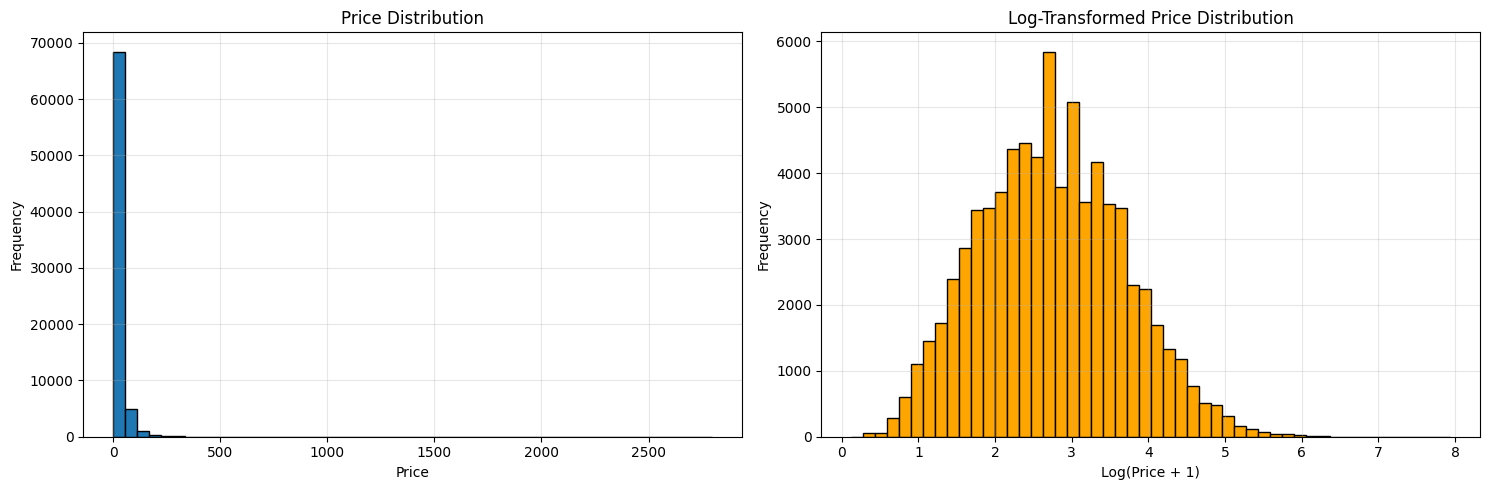

In [7]:
# Check data info
print("=== Data Info ===")
print(train_df.info())

print("\n=== Missing Values ===")
print(train_df.isnull().sum())

print("\n=== Price Statistics ===")
print(train_df['price'].describe())

# Visualize price distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Original price distribution
axes[0].hist(train_df['price'], bins=50, edgecolor='black')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Price Distribution')
axes[0].grid(True, alpha=0.3)

# Log-transformed price distribution
axes[1].hist(np.log1p(train_df['price']), bins=50, edgecolor='black', color='orange')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Log-Transformed Price Distribution')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [8]:
# Check catalog content examples
print("Sample Catalog Contents:")
for i in range(3):
    print(f"\n{'='*60}")
    print(f"Sample {i+1}")
    print(f"{'='*60}")
    print(f"Price: ${train_df.iloc[i]['price']}")
    print(f"\nContent: {train_df.iloc[i]['catalog_content'][:300]}...")
    print(f"\nImage: {train_df.iloc[i]['image_link']}")

Sample Catalog Contents:

Sample 1
Price: $4.890000000000001

Content: Item Name: La Victoria Green Taco Sauce Mild, 12 Ounce (Pack of 6)
Value: 72.0
Unit: Fl Oz
...

Image: https://m.media-amazon.com/images/I/51mo8htwTHL.jpg

Sample 2
Price: $13.12

Content: Item Name: Salerno Cookies, The Original Butter Cookies, 8 Ounce (Pack of 4)
Bullet Point 1: Original Butter Cookies: Classic butter cookies made with real butter
Bullet Point 2: Variety Pack: Includes 4 boxes with 32 cookies total
Bullet Point 3: Occasion Perfect: Delicious cookies for birthdays, w...

Image: https://m.media-amazon.com/images/I/71YtriIHAAL.jpg

Sample 3
Price: $1.97

Content: Item Name: Bear Creek Hearty Soup Bowl, Creamy Chicken with Rice, 1.9 Ounce (Pack of 6)
Bullet Point 1: Loaded with hearty long grain wild rice and vegetables
Bullet Point 2: Full of hearty goodness
Bullet Point 3: Single serve bowls
Bullet Point 4: Easy to prepare mix
Bullet Point 5: 0 grams trans ...

Image: https://m.media-amazon.com/imag

In [9]:
import re

def extract_text_features(text):
    """Extract features from catalog content"""
    text = str(text).lower()
    features = {}
    
    # Basic text statistics
    features['text_length'] = len(text)
    features['word_count'] = len(text.split())
    features['avg_word_length'] = np.mean([len(word) for word in text.split()]) if text.split() else 0
    
    # Extract Item Pack Quantity (IPQ)
    pack_patterns = [
        r'(\d+)\s*pack',
        r'pack\s*of\s*(\d+)',
        r'(\d+)\s*count',
        r'set\s*of\s*(\d+)',
        r'(\d+)\s*piece'
    ]
    pack_quantity = 1
    for pattern in pack_patterns:
        match = re.search(pattern, text)
        if match:
            pack_quantity = int(match.group(1))
            break
    features['pack_quantity'] = pack_quantity
    
    # Extract all numbers from text (could be specs)
    numbers = re.findall(r'\d+\.?\d*', text)
    numbers = [float(n) for n in numbers if float(n) < 100000]  # Filter unrealistic numbers
    features['num_count'] = len(numbers)
    features['avg_number'] = np.mean(numbers) if numbers else 0
    features['max_number'] = max(numbers) if numbers else 0
    features['min_number'] = min(numbers) if numbers else 0
    
    # Check for keywords that might indicate premium products
    premium_keywords = ['premium', 'deluxe', 'professional', 'organic', 'natural', 'pro']
    features['has_premium_keyword'] = int(any(keyword in text for keyword in premium_keywords))
    
    # Count special characters
    features['special_char_count'] = len(re.findall(r'[^a-zA-Z0-9\s]', text))
    
    # Check for size indicators
    size_keywords = ['large', 'small', 'medium', 'xl', 'xxl', 'mini']
    features['has_size_keyword'] = int(any(keyword in text for keyword in size_keywords))
    
    # Check for material keywords
    material_keywords = ['cotton', 'plastic', 'metal', 'wood', 'steel', 'aluminum', 'glass']
    features['has_material_keyword'] = int(any(keyword in text for keyword in material_keywords))
    
    return features

# Apply to training data
print("Extracting text features from training data...")
text_features_train = train_df['catalog_content'].apply(extract_text_features)
text_features_train_df = pd.DataFrame(text_features_train.tolist())

print("\n✓ Feature extraction complete!")
print("\nExtracted Features:")
print(text_features_train_df.head())
print(f"\nShape: {text_features_train_df.shape}")
print(f"Features: {text_features_train_df.columns.tolist()}")

Extracting text features from training data...

✓ Feature extraction complete!

Extracted Features:
   text_length  word_count  avg_word_length  pack_quantity  num_count  \
0           91          18         4.055556              6          3   
1          511          80         5.387500              4         11   
2          328          59         4.559322              6          9   
3         1318         211         5.246445              1          8   
4          155          28         4.535714              1          5   

   avg_number  max_number  min_number  has_premium_keyword  \
0   30.000000        72.0         6.0                    0   
1  183.636364      1925.0         1.0                    0   
2    3.811111        11.4         0.0                    0   
3  255.812500      2009.0         1.0                    1   
4   12.280000        12.7        12.0                    0   

   special_char_count  has_size_keyword  has_material_keyword  
0                   7   

In [10]:
print("Extracting text features from test data...")
text_features_test = test_df['catalog_content'].apply(extract_text_features)
text_features_test_df = pd.DataFrame(text_features_test.tolist())

print(f"✓ Test features shape: {text_features_test_df.shape}")
print("\nSample test features:")
print(text_features_test_df.head())

Extracting text features from test data...
✓ Test features shape: (75000, 12)

Sample test features:
   text_length  word_count  avg_word_length  pack_quantity  num_count  \
0         1274         205         5.214634              1         12   
1         1720         271         5.346863              1         10   
2          769         134         4.738806            180         10   
3           82          15         4.466667              2          3   
4         1491         236         5.317797              1         10   

   avg_number  max_number  min_number  has_premium_keyword  \
0   34.541667       300.0         1.0                    1   
1    2.800000         6.0         1.0                    1   
2   23.300000       180.0         1.0                    1   
3    6.666667        16.0         2.0                    0   
4   17.500000        32.0         1.0                    1   

   special_char_count  has_size_keyword  has_material_keyword  
0                  63  

Feature Correlations with Price:
price                   1.000000
special_char_count      0.152190
text_length             0.146752
word_count              0.144423
num_count               0.130560
has_premium_keyword     0.099862
avg_word_length         0.053242
has_size_keyword        0.043106
has_material_keyword    0.038202
max_number              0.018103
avg_number              0.013488
pack_quantity           0.006510
min_number              0.002377
Name: price, dtype: float64


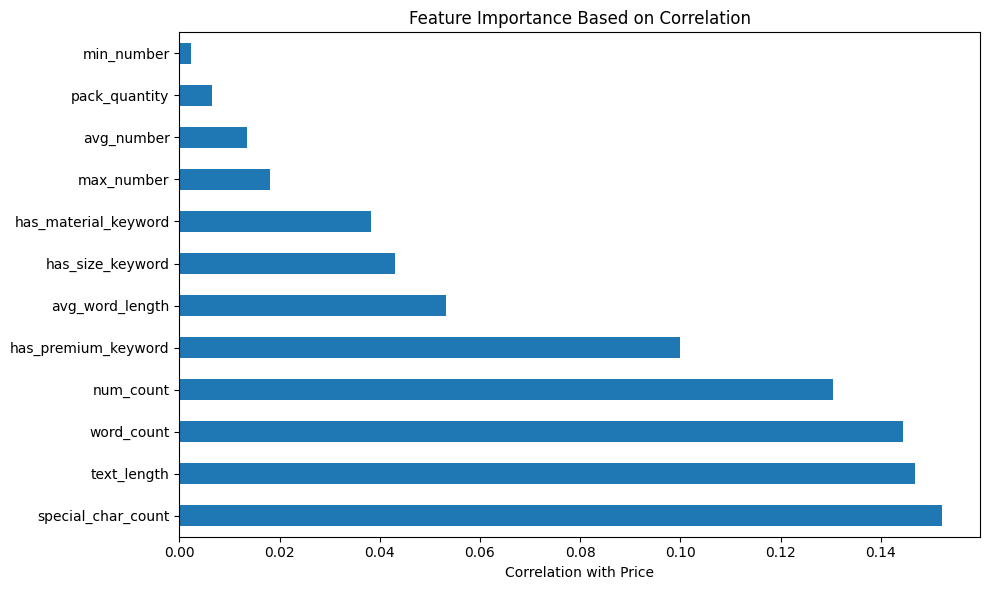

In [11]:
# Combine features with target for correlation analysis
features_with_target = text_features_train_df.copy()
features_with_target['price'] = train_df['price'].values

# Calculate correlations with price
correlations = features_with_target.corr()['price'].sort_values(ascending=False)
print("Feature Correlations with Price:")
print(correlations)

# Visualize correlations
plt.figure(figsize=(10, 6))
correlations.drop('price').plot(kind='barh')
plt.xlabel('Correlation with Price')
plt.title('Feature Importance Based on Correlation')
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features and target
X = text_features_train_df.values
y = train_df['price'].values

# Log transform target (helps with skewed distribution)
y_log = np.log1p(y)

# Split data
X_train, X_val, y_train, y_val = train_test_split(
    X, y_log, test_size=0.2, random_state=42
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print(f"✓ Data prepared successfully!")
print(f"Training set: {X_train_scaled.shape}")
print(f"Validation set: {X_val_scaled.shape}")
print(f"\nTarget (log-transformed) statistics:")
print(f"  Mean: {y_train.mean():.4f}")
print(f"  Std: {y_train.std():.4f}")
print(f"  Min: {y_train.min():.4f}")
print(f"  Max: {y_train.max():.4f}")

✓ Data prepared successfully!
Training set: (60000, 12)
Validation set: (15000, 12)

Target (log-transformed) statistics:
  Mean: 2.7409
  Std: 0.9395
  Min: 0.1222
  Max: 7.1554


In [13]:
def smape(y_true, y_pred):
    """Calculate Symmetric Mean Absolute Percentage Error"""
    denominator = (np.abs(y_true) + np.abs(y_pred))
    # Avoid division by zero
    denominator = np.where(denominator == 0, 1e-8, denominator)
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / denominator)

# Test the function
test_true = np.array([100, 200, 300])
test_pred = np.array([110, 190, 320])
test_smape = smape(test_true, test_pred)
print(f"✓ SMAPE function defined successfully!")
print(f"Test SMAPE (should be ~6.5): {test_smape:.2f}")

✓ SMAPE function defined successfully!
Test SMAPE (should be ~6.5): 7.03


In [14]:
from sklearn.ensemble import RandomForestRegressor

print("Training baseline Random Forest model...")
print("This may take a few minutes...\n")

rf_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

rf_model.fit(X_train_scaled, y_train)

# Predict on validation set
y_pred_log = rf_model.predict(X_val_scaled)
y_pred = np.expm1(y_pred_log)  # Reverse log transform
y_val_actual = np.expm1(y_val)

# Calculate SMAPE
score = smape(y_val_actual, y_pred)
print(f"\n{'='*60}")
print(f"Baseline Random Forest SMAPE: {score:.4f}")
print(f"{'='*60}")

# Show some predictions
comparison = pd.DataFrame({
    'Actual': y_val_actual[:10],
    'Predicted': y_pred[:10],
    'Difference': y_val_actual[:10] - y_pred[:10],
    'Error %': 100 * np.abs(y_val_actual[:10] - y_pred[:10]) / y_val_actual[:10]
})
print("\nSample Predictions:")
print(comparison.to_string(index=False))

Training baseline Random Forest model...
This may take a few minutes...



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.7s



Baseline Random Forest SMAPE: 64.5563

Sample Predictions:
 Actual  Predicted  Difference   Error %
 12.195  10.968833    1.226167 10.054670
 38.540  49.614557  -11.074557 28.735228
 17.860  15.373072    2.486928 13.924569
  2.940   5.722179   -2.782179 94.631948
 25.990  11.609952   14.380048 55.329159
 41.510  20.357454   21.152546 50.957712
 59.200  49.614557    9.585443 16.191627
 24.920  26.522307   -1.602307  6.429805
 82.010  56.068768   25.941232 31.631791
 19.285  19.356198   -0.071198  0.369188


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   12.5s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


In [15]:
import lightgbm as lgb

print("Training LightGBM model...")
print("This will show progress every 100 iterations...\n")

lgb_model = lgb.LGBMRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=8,
    num_leaves=31,
    min_child_samples=20,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

lgb_model.fit(
    X_train_scaled, y_train,
    eval_set=[(X_val_scaled, y_val)],
    callbacks=[lgb.early_stopping(50), lgb.log_evaluation(100)]
)

# Predict
y_pred_log_lgb = lgb_model.predict(X_val_scaled)
y_pred_lgb = np.expm1(y_pred_log_lgb)

# Calculate SMAPE
score_lgb = smape(y_val_actual, y_pred_lgb)

print(f"\n{'='*60}")
print(f"LightGBM SMAPE: {score_lgb:.4f}")
print(f"Random Forest SMAPE: {score:.4f}")
print(f"Improvement: {score - score_lgb:.4f} ({((score - score_lgb)/score * 100):.2f}%)")
print(f"{'='*60}")

# Show improved predictions
comparison_lgb = pd.DataFrame({
    'Actual': y_val_actual[:10],
    'RF Predicted': y_pred[:10],
    'LGB Predicted': y_pred_lgb[:10],
    'LGB Error %': 100 * np.abs(y_val_actual[:10] - y_pred_lgb[:10]) / y_val_actual[:10]
})
print("\nComparison of Predictions:")
print(comparison_lgb.to_string(index=False))

Training LightGBM model...
This will show progress every 100 iterations...

Training until validation scores don't improve for 50 rounds
[100]	valid_0's l2: 0.714318
[200]	valid_0's l2: 0.700129
[300]	valid_0's l2: 0.692542
[400]	valid_0's l2: 0.686842
[500]	valid_0's l2: 0.682984
[600]	valid_0's l2: 0.679926
[700]	valid_0's l2: 0.678267
[800]	valid_0's l2: 0.676463
[900]	valid_0's l2: 0.674832
[1000]	valid_0's l2: 0.673274
Did not meet early stopping. Best iteration is:
[999]	valid_0's l2: 0.673251

LightGBM SMAPE: 63.0073
Random Forest SMAPE: 64.5563
Improvement: 1.5489 (2.40%)

Comparison of Predictions:
 Actual  RF Predicted  LGB Predicted  LGB Error %
 12.195     10.968833       8.944587    26.653657
 38.540     49.614557      49.574357    28.630922
 17.860     15.373072      14.523005    18.684183
  2.940      5.722179       4.976412    69.265722
 25.990     11.609952      14.929764    42.555736
 41.510     20.357454      20.659698    50.229589
 59.200     49.614557      50.10034

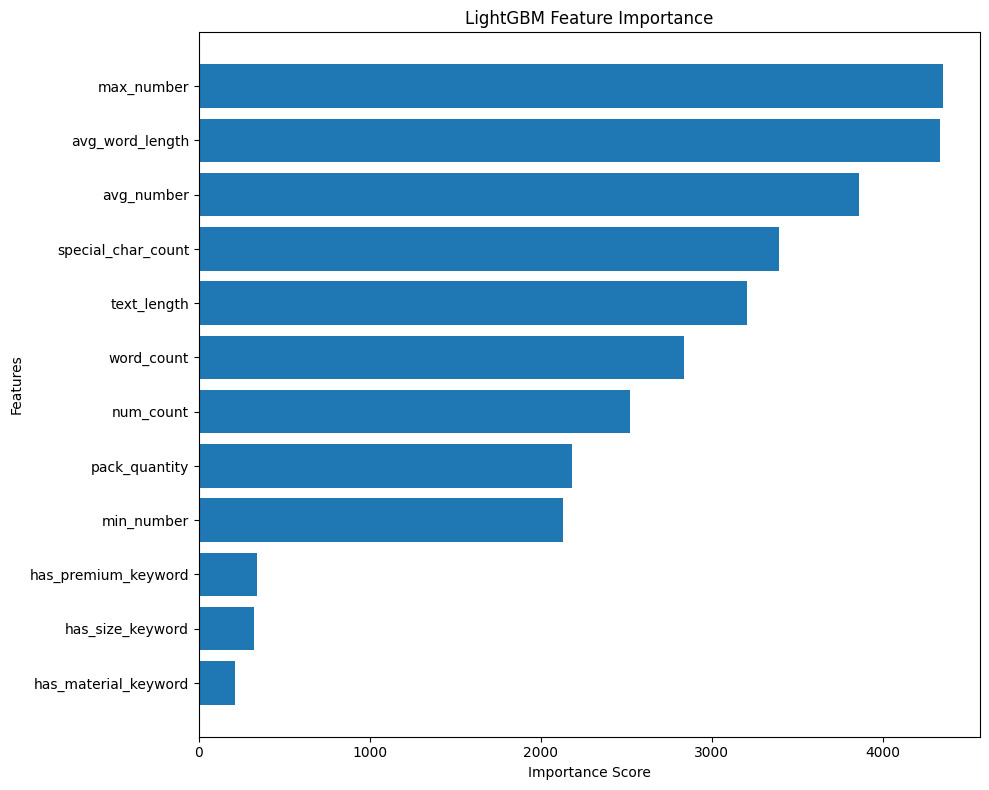


Feature Importance Ranking:
             feature  importance
          max_number        4351
     avg_word_length        4337
          avg_number        3858
  special_char_count        3395
         text_length        3208
          word_count        2837
           num_count        2521
       pack_quantity        2185
          min_number        2132
 has_premium_keyword         342
    has_size_keyword         323
has_material_keyword         209


In [16]:
# Plot feature importance
feature_importance = pd.DataFrame({
    'feature': text_features_train_df.columns,
    'importance': lgb_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('LightGBM Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

print("\nFeature Importance Ranking:")
print(feature_importance.to_string(index=False))

In [17]:
from xgboost import XGBRegressor

print("Training XGBoost model...")

xgb_model = XGBRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=8,
    random_state=42,
    n_jobs=-1,
    verbosity=1
)

xgb_model.fit(X_train_scaled, y_train)

# Predict
y_pred_log_xgb = xgb_model.predict(X_val_scaled)
y_pred_xgb = np.expm1(y_pred_log_xgb)

# Calculate SMAPE
score_xgb = smape(y_val_actual, y_pred_xgb)

print(f"\n{'='*60}")
print(f"Model Performance Comparison:")
print(f"{'='*60}")
print(f"Random Forest SMAPE: {score:.4f}")
print(f"LightGBM SMAPE:      {score_lgb:.4f}")
print(f"XGBoost SMAPE:       {score_xgb:.4f}")
print(f"{'='*60}")

Training XGBoost model...

Model Performance Comparison:
Random Forest SMAPE: 64.5563
LightGBM SMAPE:      63.0073
XGBoost SMAPE:       62.6922


In [18]:
print("Creating ensemble of all models...")

# Combine predictions from all three models
y_ensemble_val = (0.4 * y_pred_lgb + 0.3 * y_pred_xgb + 0.3 * y_pred)

# Calculate ensemble SMAPE
score_ensemble = smape(y_val_actual, y_ensemble_val)

print(f"\n{'='*60}")
print(f"Final Model Performance:")
print(f"{'='*60}")
print(f"Random Forest:  {score:.4f}")
print(f"LightGBM:       {score_lgb:.4f}")
print(f"XGBoost:        {score_xgb:.4f}")
print(f"Ensemble:       {score_ensemble:.4f} ⭐")
print(f"{'='*60}")

# Determine best model
best_model_name = min(
    [('Random Forest', score, rf_model),
     ('LightGBM', score_lgb, lgb_model),
     ('XGBoost', score_xgb, xgb_model),
     ('Ensemble', score_ensemble, None)],
    key=lambda x: x[1]
)

print(f"\n🏆 Best Model: {best_model_name[0]} with SMAPE: {best_model_name[1]:.4f}")

Creating ensemble of all models...

Final Model Performance:
Random Forest:  64.5563
LightGBM:       63.0073
XGBoost:        62.6922
Ensemble:       63.0718 ⭐

🏆 Best Model: XGBoost with SMAPE: 62.6922


Generating predictions for test set...
Test samples: 75000


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.4s finished



✓ Predictions generated!

Prediction Statistics:
  Count: 75000
  Min price: $2.48
  Max price: $189.66
  Mean price: $16.53
  Median price: $14.06


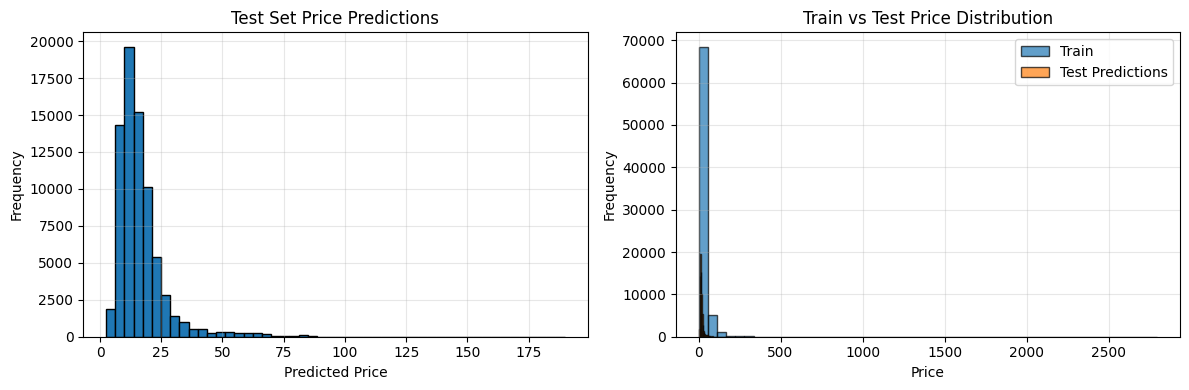

In [19]:
# Prepare test data
X_test = text_features_test_df.values
X_test_scaled = scaler.transform(X_test)

print("Generating predictions for test set...")
print(f"Test samples: {len(X_test)}")

# Generate predictions from all models
pred_rf = np.expm1(rf_model.predict(X_test_scaled))
pred_lgb = np.expm1(lgb_model.predict(X_test_scaled))
pred_xgb = np.expm1(xgb_model.predict(X_test_scaled))

# Create ensemble prediction
y_test_pred = (0.4 * pred_lgb + 0.3 * pred_xgb + 0.3 * pred_rf)

# Ensure positive values
y_test_pred = np.maximum(y_test_pred, 0.01)

print(f"\n✓ Predictions generated!")
print(f"\nPrediction Statistics:")
print(f"  Count: {len(y_test_pred)}")
print(f"  Min price: ${y_test_pred.min():.2f}")
print(f"  Max price: ${y_test_pred.max():.2f}")
print(f"  Mean price: ${y_test_pred.mean():.2f}")
print(f"  Median price: ${np.median(y_test_pred):.2f}")

# Show distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(y_test_pred, bins=50, edgecolor='black')
plt.xlabel('Predicted Price')
plt.ylabel('Frequency')
plt.title('Test Set Price Predictions')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(train_df['price'], bins=50, edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test_pred, bins=50, edgecolor='black', alpha=0.7, label='Test Predictions')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Train vs Test Price Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [20]:
# Create submission dataframe
submission = pd.DataFrame({
    'sample_id': test_df['sample_id'],
    'price': y_test_pred
})

# Verify format matches sample
print("Submission File Information:")
print(f"{'='*60}")
print(f"Shape: {submission.shape}")
print(f"Columns: {submission.columns.tolist()}")
print(f"{'='*60}")

print("\nFirst 10 rows:")
print(submission.head(10))

print("\nLast 10 rows:")
print(submission.tail(10))

# Check if all sample_ids are present
print(f"\n✓ All test samples included: {len(submission) == len(test_df)}")
print(f"✓ No duplicate sample_ids: {len(submission['sample_id'].unique()) == len(submission)}")

# Save to CSV
submission.to_csv('output/submission.csv', index=False)
print("\n🎉 Submission file saved to: output/submission.csv")

Submission File Information:
Shape: (75000, 2)
Columns: ['sample_id', 'price']

First 10 rows:
   sample_id      price
0     100179  15.864183
1     245611  20.813401
2     146263  25.157288
3      95658   9.925281
4      36806  20.129863
5     148239  10.969304
6      92659   8.964048
7       3780  14.715002
8     196940  11.390624
9      20472   6.665290

Last 10 rows:
       sample_id      price
74990     191799   9.549963
74991     162948   7.535161
74992     135024  14.266717
74993     128344   8.393101
74994      46996  14.796624
74995      93616   7.117640
74996     249434  21.082719
74997     162217   9.428302
74998     230487  12.961174
74999     279477  11.389408

✓ All test samples included: True
✓ No duplicate sample_ids: True

🎉 Submission file saved to: output/submission.csv


In [21]:
# Load and verify the submission file
saved_submission = pd.read_csv('output/submission.csv')

print("Submission Validation Checklist:")
print(f"{'='*60}")

checks = [
    ("File has correct shape", saved_submission.shape == (len(test_df), 2)),
    ("Has 'sample_id' column", 'sample_id' in saved_submission.columns),
    ("Has 'price' column", 'price' in saved_submission.columns),
    ("All prices positive", (saved_submission['price'] > 0).all()),
    ("No missing values", saved_submission.isnull().sum().sum() == 0),
    ("Correct number of rows", len(saved_submission) == len(test_df)),
    ("No duplicate sample_ids", len(saved_submission['sample_id'].unique()) == len(saved_submission)),
    ("All test sample_ids present", set(saved_submission['sample_id']) == set(test_df['sample_id']))
]

for check_name, result in checks:
    status = "✓" if result else "✗"
    print(f"{status} {check_name}: {result}")

print(f"{'='*60}")

if all(result for _, result in checks):
    print("\n🎉 SUCCESS! Your submission file is ready for upload!")
    print(f"\nFile location: C:/Users/adity/OneDrive/Desktop/smart_pricing/output/submission.csv")
else:
    print("\n⚠️ WARNING: Some validation checks failed. Please review.")

Submission Validation Checklist:
✓ File has correct shape: True
✓ Has 'sample_id' column: True
✓ Has 'price' column: True
✓ All prices positive: True
✓ No missing values: True
✓ Correct number of rows: True
✓ No duplicate sample_ids: True
✓ All test sample_ids present: True

🎉 SUCCESS! Your submission file is ready for upload!

File location: C:/Users/adity/OneDrive/Desktop/smart_pricing/output/submission.csv


In [22]:
# Load and verify the submission file
saved_submission = pd.read_csv('output/submission.csv')

print("Submission Validation Checklist:")
print(f"{'='*60}")

checks = [
    ("File has correct shape", saved_submission.shape == (len(test_df), 2)),
    ("Has 'sample_id' column", 'sample_id' in saved_submission.columns),
    ("Has 'price' column", 'price' in saved_submission.columns),
    ("All prices positive", (saved_submission['price'] > 0).all()),
    ("No missing values", saved_submission.isnull().sum().sum() == 0),
    ("Correct number of rows", len(saved_submission) == len(test_df)),
    ("No duplicate sample_ids", len(saved_submission['sample_id'].unique()) == len(saved_submission)),
    ("All test sample_ids present", set(saved_submission['sample_id']) == set(test_df['sample_id']))
]

for check_name, result in checks:
    status = "✓" if result else "✗"
    print(f"{status} {check_name}: {result}")

print(f"{'='*60}")

if all(result for _, result in checks):
    print("\n🎉 SUCCESS! Your submission file is ready for upload!")
    print(f"\nFile location: C:/Users/adity/OneDrive/Desktop/smart_pricing/output/submission.csv")
else:
    print("\n⚠️ WARNING: Some validation checks failed. Please review.")

Submission Validation Checklist:
✓ File has correct shape: True
✓ Has 'sample_id' column: True
✓ Has 'price' column: True
✓ All prices positive: True
✓ No missing values: True
✓ Correct number of rows: True
✓ No duplicate sample_ids: True
✓ All test sample_ids present: True

🎉 SUCCESS! Your submission file is ready for upload!

File location: C:/Users/adity/OneDrive/Desktop/smart_pricing/output/submission.csv


In [23]:
# Compare format with sample output
print("Comparing with sample output format:")
print(f"\n{'='*60}")
print("Sample Output Format:")
print(sample_out.head())
print(f"\nYour Submission Format:")
print(submission.head())
print(f"{'='*60}")

print(f"\n✓ Columns match: {list(sample_out.columns) == list(submission.columns)}")
print(f"✓ Data types match: {sample_out.dtypes.equals(submission.dtypes)}")

Comparing with sample output format:

Sample Output Format:
   sample_id      price
0     217392  62.080008
1     209156  17.189763
2     262333  96.501410
3     295979   5.652474
4      50604  23.794780

Your Submission Format:
   sample_id      price
0     100179  15.864183
1     245611  20.813401
2     146263  25.157288
3      95658   9.925281
4      36806  20.129863

✓ Columns match: True
✓ Data types match: True
